## Final Project Submission

Please fill out:
* Student name: Leticia D Fernandes
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


In [121]:
import sqlite3
import pandas as pd
import csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [207]:
data = pd.read_csv('data/kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [123]:
import numpy as np
#data = data.drop(data[data.price>6000000])
data['yr_renovated'] = data.yr_renovated.fillna(0)
date_temp=pd.DataFrame({'yr_sold':pd.to_datetime(data.date).dt.year,'yr_renovated':data.yr_renovated,'yr_built':data.yr_built})
date_temp
data['inner_age']=np.where(date_temp.yr_renovated==0,(date_temp.yr_sold-date_temp.yr_built),(date_temp.yr_renovated-date_temp.yr_built))

In [124]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_square =data[['price','grade','sqft_living']]
df_square['grade_sq']=np.square(df_square.grade)
df_square['grade_log']=np.log(df_square.grade)
df_square['grade_exp']=np.exp(df_square.grade)
df_square['log_price']=np.log(df_square.price)
formula = 'log_price~grade'
model = ols(formula=formula, data=df_square).fit()
#model.summary()

In [125]:
data['waterfront']=data.waterfront.fillna(0)
data['view']=data.view.fillna(0)          

In [126]:
#sns.boxplot(x=df_square['grade'],y=df_square['log_price'])

In [127]:
data.yr_renovated
data['yr_renovated'] = data.yr_renovated.fillna(0)
ren_selection = data.yr_renovated>=2000
data.yr_renovated[ren_selection]=1.0
data.yr_renovated[~ren_selection]=0.0
data = data.rename(columns={'yr_renovated':'is_renovated'})


In [128]:
data['waterfront']=data['waterfront'].fillna(0)

In [129]:
data = data.sort_values(by=['date']).reset_index()
data=data.drop('index',axis=1)
data = data.drop_duplicates(subset=['id'],keep='last')
data=data.drop(['date'],axis=1)

In [130]:
data['log_price']=np.log(data.price)

In [131]:
data=data.drop(columns=['sqft_above','sqft_living15','sqft_lot15','sqft_basement'], axis=1)
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built',
       'is_renovated', 'zipcode', 'lat', 'long', 'inner_age', 'log_price'],
      dtype='object')

In [132]:
data = data.drop(data[data.sqft_lot>600000].index)
data = data.drop(data[data.sqft_living>13000].index)

In [133]:
#sns.lmplot(x='yr_built', y='price', data=data[data.price<2000000].sample(1000),markers=["x"],height=10)

In [134]:
# plt.figure(figsize=(17,12))
# sns.scatterplot(data=data, x="long", y="lat", hue="price",)

In [135]:
# fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,4))
# for xcol, ax in zip(['sqft_living', 'sqft_lot', 'yr_built'], axes):
#     data.plot(kind='scatter', x=xcol, y='log_price', ax=ax, alpha=0.4, color='b')

In [136]:
# fig, axes = plt.subplots(nrows=1,ncols=7, figsize=(16,5))

# for xcol, ax in zip(['floors', 'condition', 'bedrooms', 'bathrooms','grade','waterfront','is_renovated'], axes):
#     data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

data = data.drop(data[data.bedrooms>=30].index)

In [137]:
#We define our categorical data
categoricals =['bedrooms','floors','waterfront','condition','grade']

#We notice that there are not many houses wiht greator than 6 bedrooms, since there is not
#sufficient data to train our model obove this value, we will drop those houses
data = data.drop(data[data['bedrooms']>6].index)


#We see also that there are not many houses with a grade below 5 and above 12. We will restrict our analysis
#to houses wiht grades between these values
data = data[(data.grade>=5) & (data.grade<=12)]

data=data.reset_index(drop=True)

#The grade values are most commonly in the ranges 5-7, 7-9,9-12
#These data will be bineed into these three ranges
data['grade_bins']=pd.cut(data.grade, bins=(5,6,7,9,12),labels=('dropped','fair','good','excellent'))

#data['grade_sq']=np.square(data.grade)
#data['bed_sq']=np.square(data.bedrooms)
data['yr_bins']=pd.cut(data.yr_built, bins=(1900,2000,2015),labels=('dropped','new'))

bed_dummies = pd.get_dummies(data.bedrooms,prefix='beds',drop_first=True)
grade_dummies = pd.get_dummies(data.grade_bins,prefix='grade',drop_first=True)
yr_dummies = pd.get_dummies(data.yr_bins,prefix='age',drop_first=True)



In [138]:
zip_data=data[['zipcode','price']].groupby('zipcode').agg(['median'])['price']['median'].reset_index().sort_values('median').reset_index(drop=True)

bin1=set(zip_data.zipcode.iloc[0:10].values)
bin2=set(zip_data.zipcode.iloc[10:20].values)
bin3=set(zip_data.zipcode.iloc[20:30].values)
bin4=set(zip_data.zipcode.iloc[30:40].values)
bin5=set(zip_data.zipcode.iloc[40:50].values)
bin6=set(zip_data.zipcode.iloc[50:60].values)
bin7=set(zip_data.zipcode.iloc[60:61].values)
bin8=set(zip_data.zipcode.iloc[61:62].values)
bin9=set(zip_data.zipcode.iloc[63:64].values)
bin10=set(zip_data.zipcode.iloc[64:65].values)
bin11=set(zip_data.zipcode.iloc[65:66].values)
bin12=set(zip_data.zipcode.iloc[66:67].values)
bin13=set(zip_data.zipcode.iloc[67:68].values)
bin14=set(zip_data.zipcode.iloc[68:69].values)

In [139]:
zip_dict={}
for i_,code in enumerate(data.zipcode):
    if code in bin1:
        zip_dict[i_]='bin1'
    elif code in bin2:
        zip_dict[i_]='bin2'
    elif code in bin3:
        zip_dict[i_]='bin3'
    elif code in bin4:
        zip_dict[i_]='bin4'
    elif code in bin5:
        zip_dict[i_]='bin5'
    elif code in bin6:
        zip_dict[i_]='bin6'
    elif code in bin7:
        zip_dict[i_]='bin7'
    elif code in bin8:
        zip_dict[i_]='bin8'
    elif code in bin9:
        zip_dict[i_]='bin9'
    elif code in bin10:
        zip_dict[i_]='bin10'
    elif code in bin11:
        zip_dict[i_]='bin11'
    elif code in bin12:
        zip_dict[i_]='bin12'
    elif code in bin13:
        zip_dict[i_]='bin13'
    else:
        zip_dict[i_]='bin14'

In [140]:
zip_df=pd.DataFrame.from_dict(zip_dict,orient='index',columns=['zip_bins'])

In [141]:
zip_dummies=pd.get_dummies(zip_df.zip_bins,prefix='zip',drop_first=True)

In [142]:
data.zipcode

0        98042
1        98030
2        98003
3        98166
4        98028
         ...  
21298    98116
21299    98004
21300    98122
21301    98058
21302    98055
Name: zipcode, Length: 21303, dtype: int64

In [143]:
preprocessed = pd.concat([data,bed_dummies, grade_dummies,
                          yr_dummies, zip_dummies], axis=1).drop(['grade_bins','yr_bins','bedrooms','id','grade','yr_built','zipcode','long'],axis=1)

In [144]:
# preprocessed=preprocessed.drop(preprocessed[preprocessed.price>2000000].index)

from scipy import stats
#preprocessed = preprocessed[(np.abs(stats.zscore(preprocessed.price)) < 3)]

In [145]:
preprocessed_train=preprocessed.drop(preprocessed.sample(frac=0.3,random_state=1).index)
preprocessed_test =preprocessed.sample(frac=0.3,random_state=1)

In [146]:
preprocessed

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,is_renovated,lat,...,zip_bin13,zip_bin14,zip_bin2,zip_bin3,zip_bin4,zip_bin5,zip_bin6,zip_bin7,zip_bin8,zip_bin9
0,325000.0,2.50,2240,5105,2.0,0.0,0.0,4,0.0,47.3922,...,0,0,1,0,0,0,0,0,0,0
1,330000.0,2.50,2240,7589,2.0,0.0,0.0,3,0.0,47.3824,...,0,0,1,0,0,0,0,0,0,0
2,265000.0,1.50,1740,12728,1.0,0.0,0.0,4,0.0,47.2808,...,0,0,0,0,0,0,0,0,0,0
3,359000.0,2.50,1820,11325,1.0,0.0,0.0,3,0.0,47.4574,...,0,0,0,1,0,0,0,0,0,0
4,435000.0,2.50,2060,10125,2.0,0.0,0.0,4,0.0,47.7640,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21298,550000.0,1.50,1730,5750,1.0,0.0,0.0,3,0.0,47.5645,...,0,0,0,0,0,1,0,0,0,0
21299,975000.0,2.50,2720,11049,2.0,0.0,0.0,3,0.0,47.5815,...,0,1,0,0,0,0,0,0,0,0
21300,520000.0,1.75,1340,1368,2.0,0.0,0.0,3,0.0,47.6180,...,0,0,0,0,0,0,1,0,0,0
21301,344950.0,1.75,1870,7500,1.0,0.0,0.0,5,0.0,47.4428,...,0,0,1,0,0,0,0,0,0,0


In [147]:
X=preprocessed_train.drop(['price','log_price'],axis=1)
y=preprocessed_train['price']
y_=preprocessed_train['log_price']

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed.drop(['price','log_price'],axis=1), preprocessed.log_price, test_size=0.3, random_state=42)

In [149]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
#y_hat_test = linreg.predict(X_test)

In [150]:
linreg.score(X_train, y_train)

0.8438032712483925

In [151]:
X_train.columns

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'is_renovated', 'lat', 'inner_age', 'beds_2', 'beds_3',
       'beds_4', 'beds_5', 'beds_6', 'grade_fair', 'grade_good',
       'grade_excellent', 'age_new', 'zip_bin10', 'zip_bin11', 'zip_bin12',
       'zip_bin13', 'zip_bin14', 'zip_bin2', 'zip_bin3', 'zip_bin4',
       'zip_bin5', 'zip_bin6', 'zip_bin7', 'zip_bin8', 'zip_bin9'],
      dtype='object')

In [152]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train),squared=False)
train_mse

165857.44531937092

In [153]:
pd.DataFrame({'y_train':y_train,'y_hat_train':y_hat_train})

,y_train,y_hat_train
16804,13.275942,13.256184
8614,13.560618,13.183050
20708,12.663497,12.491280
8628,12.157407,12.833446
8410,13.023647,12.922291
...,...,...
11284,12.782686,12.731794
11964,13.415779,13.258604
5390,12.826649,12.890259
860,13.298835,13.211746


<AxesSubplot:xlabel='y_train', ylabel='y_hat_train'>

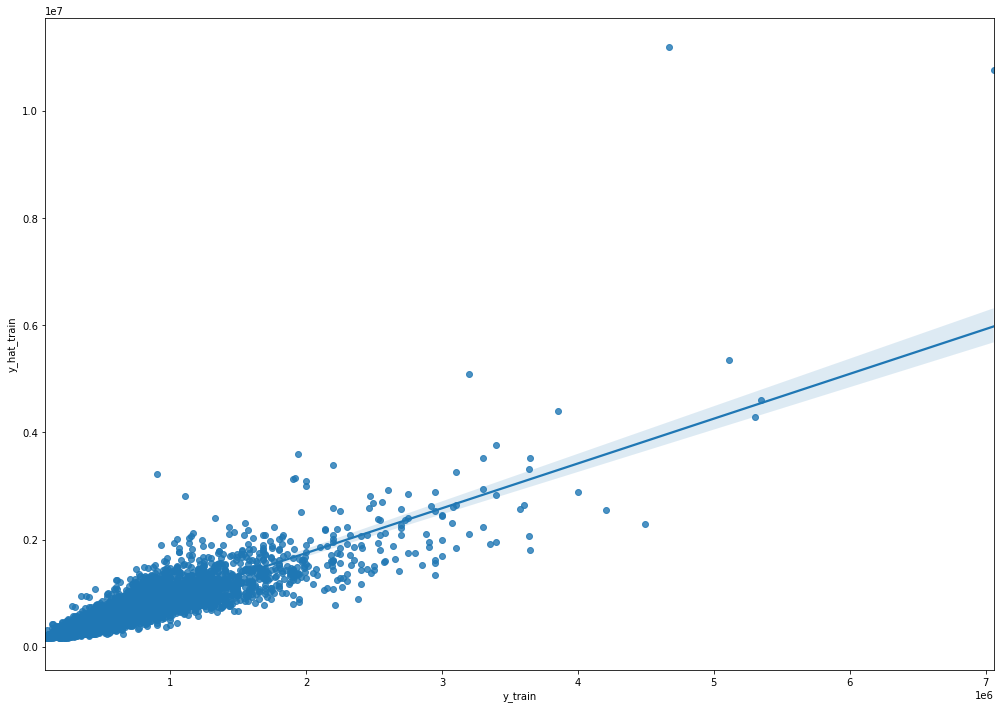

In [154]:
plt.figure(figsize=(17,12))
sns.regplot(data=pd.DataFrame({'y_train':np.exp(y_train),'y_hat_train':np.exp(y_hat_train)}), x="y_train", y="y_hat_train")

In [155]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#predictors=preprocessed_train.columns[1:]
predictors=X.columns

outcome = 'log_price'
formula = outcome + '~' + '+'.join(predictors)

model = ols(formula=formula, data=X.join(y_)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2502.
Date:                Sat, 11 Sep 2021   Prob (F-statistic):               0.00
Time:                        08:37:05   Log-Likelihood:                 2323.6
No. Observations:               14912   AIC:                            -4581.
Df Residuals:                   14879   BIC:                            -4330.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.0152      0.993     -9.083      0.000     -10.961      -7.070
bathrooms           0.0477      0.004     11.761      0.000       0.040       0.056
sqft_living         0.0002   3.78e-06     57.773      0.000       0.000       0.000
sqft_lot         5.088e-07   5.42e-08      9.389      0.000    4.03e-07    6.15e-07
floors              0.0186      0.004      4.324      0.000       0.010       0.027
waterfront          0.3825      0.023     16.777      0.000       0.338       0.427
view                0.0818      0.003     31.756      0.000       0.077       0.087
condition           0.0481      0.003     16.389      0.000       0.042       0.054
is_renovated        0.1318      0.013     10.061      0.000       0.106       0.158
lat                 0.4314      0.021     20.609      0.000       0.390       0.472
inner_age           0.0029   9.97e-05     29.001      0.000       0.003       0.003
beds_2              0.0793      0.018      4.308      0.000       0.043       0.115
beds_3              0.0791      0.018      4.324      0.000       0.043       0.115
beds_4              0.0798      0.019      4.268      0.000       0.043       0.116
beds_5              0.0426      0.020      2.150      0.032       0.004       0.082
beds_6             -0.0300      0.024     -1.235      0.217      -0.077       0.018
grade_fair          0.1442      0.007     21.854      0.000       0.131       0.157
grade_good          0.2806      0.008     35.524      0.000       0.265       0.296
grade_excellent     0.4409      0.012     36.351      0.000       0.417       0.465
age_new             0.0812      0.006     13.586      0.000       0.069       0.093
zip_bin10           0.5571      0.013     42.757      0.000       0.532       0.583
zip_bin11           0.6264      0.021     29.515      0.000       0.585       0.668
zip_bin12           0.7998      0.017     46.626      0.000       0.766       0.833
zip_bin13           0.7640      0.017     45.580      0.000       0.731       0.797
zip_bin14           0.7616      0.012     63.508      0.000       0.738       0.785
zip_bin2            0.1111      0.007     16.529      0.000       0.098       0.124
zip_bin3            0.2489      0.008     30.258      0.000       0.233       0.265
zip_bin4            0.3401      0.009     37.842      0.000       0.323       0.358
zip_bin5            0.4986      0.009     54.478      0.000       0.481       0.517
zip_bin6            0.5267      0.009     58.922      0.000       0.509       0.544
zip_bin7            0.7240      0.025     28.631      0.000       0.674       0.774
zip_bin8            0.6984      0.025     28.101      0.000       0.650       0.747
zip_bin9            0.7230      0.020     35.550      0.000       0.683       0.763
===========================================================

In [156]:
sm.tools.eval_measures.rmse(np.exp(y_train), np.exp(y_hat_train))

165857.44531937092

In [157]:
import scipy.stats as stats

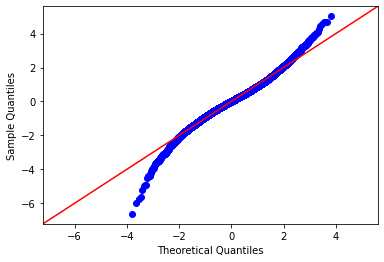

In [158]:
fig=sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
import folium
from folium import plugins
from folium.plugins import HeatMap
fig_data=data.groupby('zipcode').agg(['median'])[['lat','long','price']].reset_index()
fig_final_data = fig_data.droplevel(axis=1,level=1).drop('zipcode',axis=1)


lat = 47.56
long = -122.21

m = folium.Map(location=[lat,long], tiles='stamentoner', zoom_start=11)

HeatMap(fig_final_data,radius=30).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)

m 


In [161]:
ModelX<-lm(log(price)~log(sqft_living)+log(bedrooms+0.5)+exp(bathrooms)+
           grade+waterfront+log(lat-min(Training$lat)+0.2)+log(zipcode-min(Training$zipcode)+4)+
           log(abs(long-min(Training$long))+0.01)+
           log(view+0.5)+condition+sqft_above+log(sqft_basement+0.001)+
           log(sqft_lot15)+log(2015-yr_renovated+1)+date+(bedrooms*bathrooms)+(view*log(condition))+sqft_basement+(log(grade)*exp(condition))+(bathrooms*log(sqft_living))+log(condition)+(view*bedrooms)+(zipcode*lat),data=Training)

SyntaxError: invalid syntax (<ipython-input-161-a891bc767327>, line 1)

In [162]:
zip_data=data[['zipcode','price']].groupby('zipcode').agg(['median'])['price']['median'].reset_index().sort_values('median').reset_index(drop=True)

In [163]:
data[['zipcode','price']].groupby('zipcode').agg(['median'])['price']['median'].index

Int64Index([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
            98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
            98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
            98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
            98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
            98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
            98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
            98166, 98168, 98177, 98178, 98188, 98198, 98199],
           dtype='int64', name='zipcode')

In [164]:
a=data.groupby('zipcode').agg(['median'])

In [165]:
pd.DataFrame(index=a['price']['median'].index, data=a['price']['median'].values, columns=['price'])

,price
zipcode,
98001,260000.0
98002,235000.0
98003,267475.0
98004,1150000.0
98005,765475.0
...,...
98177,550500.0
98178,279000.0
98188,265000.0


In [170]:
fig_final_data

,lat,long,price
0,47.31635,-122.2720,260000.0
1,47.30630,-122.2150,235000.0
2,47.32845,-122.3080,267475.0
3,47.62130,-122.2050,1150000.0
4,47.60335,-122.1685,765475.0
...,...,...,...
65,47.75390,-122.3680,550500.0
66,47.49945,-122.2470,279000.0
67,47.44810,-122.2820,265000.0
68,47.39230,-122.3170,265500.0


In [ ]:
preprocessed.groupby('zipcode').agg(['median'])[['lat','long','price']].reset_index()

In [200]:
zip_values=pd.concat([data,zip_df], axis=1).drop(['zipcode','long'],axis=1)[['price','zip_bins']].groupby('zip_bins').agg(['mean'])

In [201]:
zip_values=zip_values.droplevel(axis=1,level=1).sort_values('price').reset_index()
zip_values

,zip_bins,price
0,bin1,2.809541e+05
1,bin2,3.311885e+05
2,bin3,4.172204e+05
3,bin4,5.104017e+05
4,bin5,5.958678e+05
5,bin6,6.931923e+05
6,bin11,8.102897e+05
7,bin7,8.192920e+05
8,bin10,8.494998e+05
9,bin9,8.497148e+05


In [204]:
zip_values['Relative Increase']=zip_values['price']/zip_values['price'].iloc[0]

In [205]:
zip_values

,zip_bins,price,Relative Increase
0,bin1,2.809541e+05,1.000000
1,bin2,3.311885e+05,1.178799
2,bin3,4.172204e+05,1.485013
3,bin4,5.104017e+05,1.816673
4,bin5,5.958678e+05,2.120872
5,bin6,6.931923e+05,2.467280
6,bin11,8.102897e+05,2.884064
7,bin7,8.192920e+05,2.916106
8,bin10,8.494998e+05,3.023625
9,bin9,8.497148e+05,3.024390
